# Breast Cancer Detection Using Machine Learning
# This notebook demonstrates the process of building a machine learning model to detect breast cancer using the Wisconsin Breast Cancer Dataset. The steps include data loading, preprocessing, feature engineering, model training, evaluation, and saving the trained model.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import log_loss



In [108]:
import os

# Create charts directory if it doesn't exist
os.makedirs("charts", exist_ok=True)


In [109]:

# Load the dataset
df = pd.read_csv("data/data.csv")



In [110]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [111]:
# Drop unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Encode target variable (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [112]:
df.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


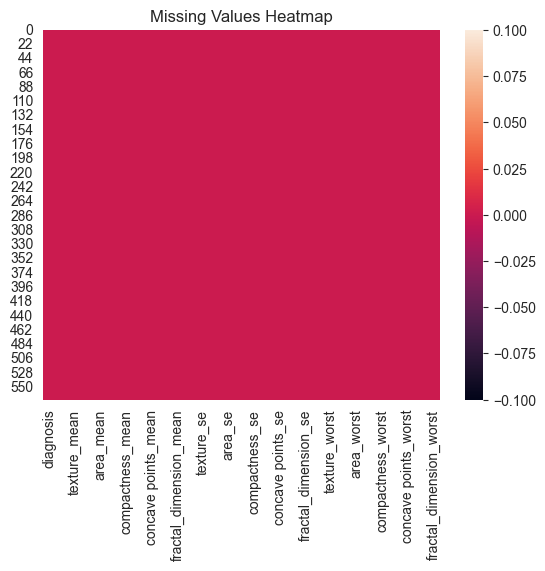

In [113]:
# Check for missing values
sns.heatmap(df.isnull(), cbar=True)
plt.title("Missing Values Heatmap")
plt.show()

##  Visualizations

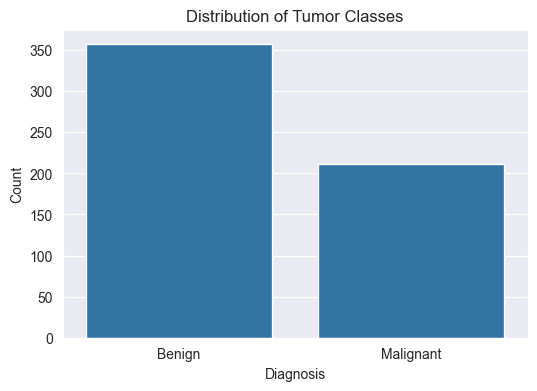

In [114]:
# class Distrubtion
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df)
plt.xticks([0,1], ['Benign', 'Malignant'])
plt.title("Distribution of Tumor Classes")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.savefig("charts/class_distribution.png", dpi=300)
plt.show()


## FEATURE DISTRIBUTION (Radius Mean)

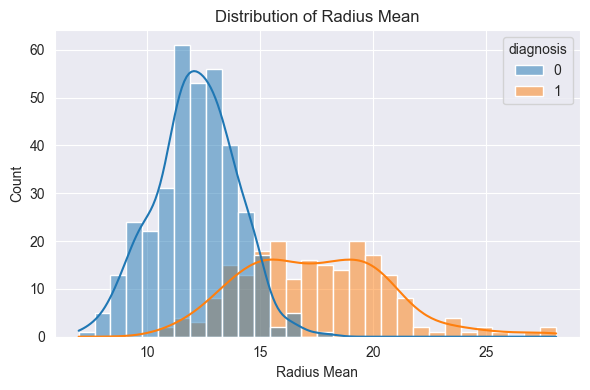

In [115]:
plt.figure(figsize=(6,4))
sns.histplot(
    data=df,
    x='radius_mean',
    hue='diagnosis',
    bins=30,
    kde=True
)
plt.title("Distribution of Radius Mean")
plt.xlabel("Radius Mean")
plt.tight_layout()
plt.savefig("charts/radius_mean_distribution.png", dpi=300)
plt.show()


## CORRELATION HEATMAP

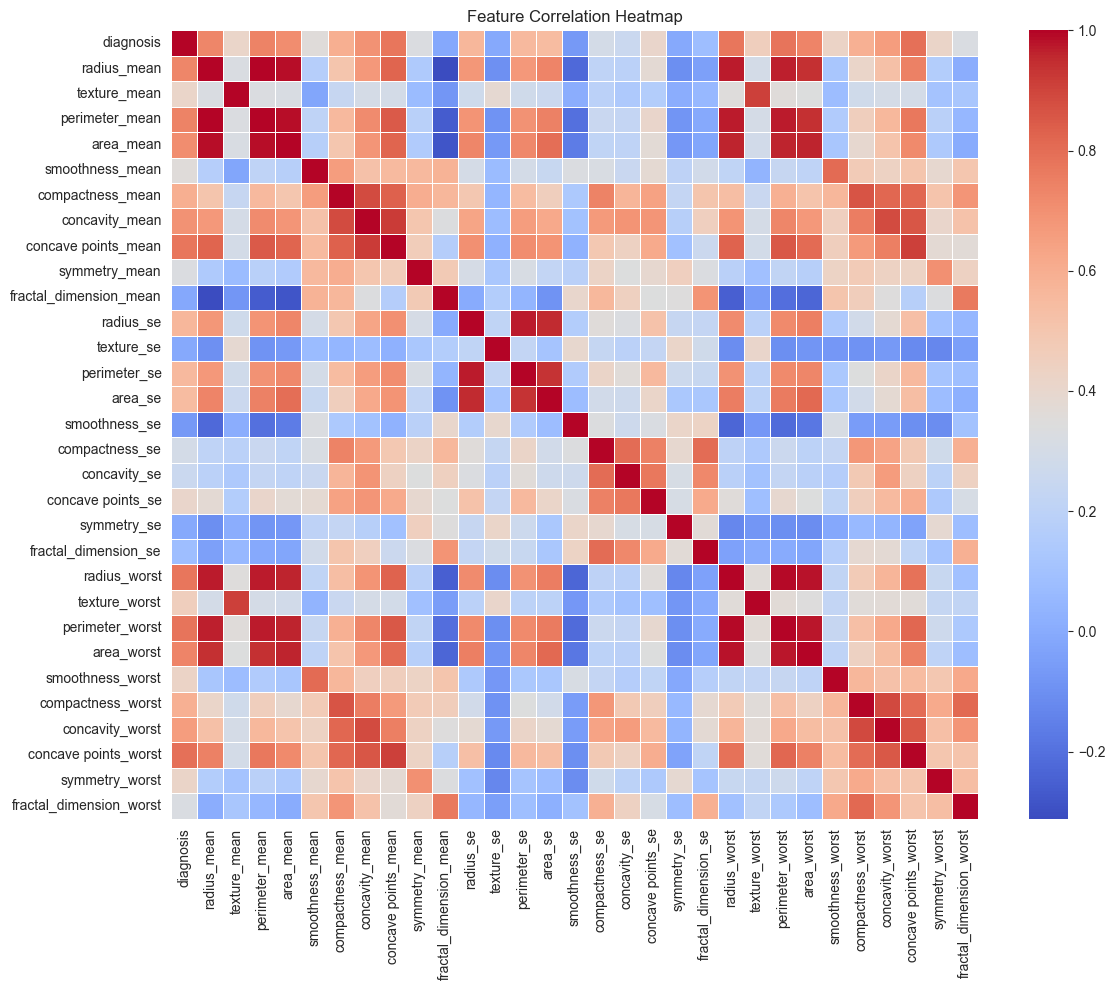

In [116]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("charts/correlation_heatmap.png", dpi=300)
plt.show()


In [117]:
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Feature Engineering


In [118]:
df['radius_perimeter_ratio'] = df['radius_mean'] / df['perimeter_mean']
df['area_radius_ratio'] = df['area_mean'] / (df['radius_mean']**2)
df['compactness_concavity_ratio'] = df['compactness_mean'] / df['concavity_mean']
df['radius_variation'] = df['radius_worst'] - df['radius_mean']
df['area_variation'] = df['area_worst'] - df['area_mean']
df['shape_irregularity'] = df['compactness_mean'] + df['concavity_mean'] + df['concave points_mean']


##  SELECT TOP 10 FEATURES

In [119]:
X_all = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_all.replace([np.inf, -np.inf], np.nan, inplace=True)
X_all.fillna(X_all.mean(), inplace=True)

scaler_all = StandardScaler()
X_scaled_all = scaler_all.fit_transform(X_all)

# temporary model to get feature importance
temp_model = LogisticRegression(max_iter=1000)
temp_model.fit(X_scaled_all, y)

feature_importance = pd.DataFrame({
    'Feature': X_all.columns,
    'Coefficient': np.abs(temp_model.coef_[0])
}).sort_values(by='Coefficient', ascending=False)

top10_features = feature_importance['Feature'].head(10).tolist()
print("Top 10 Features:", top10_features)

X = df[top10_features]

Top 10 Features: ['radius_se', 'texture_worst', 'concave points_mean', 'radius_variation', 'area_radius_ratio', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_se', 'area_se', 'area_variation']


## DATA SPLITTING & SCALING

In [120]:
# this x for feature matrix and y for target variable
# we drop diagnosis column from feature matrix
# and assign it to target variable y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## Normalization & Scaling of Data

In [121]:
## feature scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [122]:
X_test

array([[-0.5508726 ,  0.40430911, -0.49104418, ..., -0.53328772,
        -0.39662472, -0.22710271],
       [-0.58860967,  0.18652445, -1.01970135, ..., -0.37453993,
        -0.5120074 , -0.44028964],
       [-0.07574503,  0.72852988, -1.23582899, ..., -0.36375846,
        -0.48603481, -0.55863827],
       ...,
       [-0.42148839,  0.80876633,  0.25093973, ...,  0.2567335 ,
        -0.3090534 , -0.17490179],
       [-0.34134206,  0.03751389, -0.7245374 , ...,  0.03515578,
        -0.35640167, -0.33230149],
       [ 1.19473605,  3.19129774,  0.45413231, ..., -0.55968373,
         1.59981752,  4.08923537]], shape=(171, 10))

In [123]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

#predict the target for the test data
y_pred_log = log_model.predict(X_test)


In [124]:
# 0 its mean the prdiciction was that it's not malignant
# 1 its mean the prdiciction was that it's malignant
y_pred_log

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [125]:

# ==============================
# SIGMOID FUNCTION (MANUAL)
# ==============================
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [126]:
# ==============================
# MANUAL Z & SIGMOID CALCULATION
# ==============================
weights = log_model.coef_[0]
bias = log_model.intercept_[0]

z_values = np.dot(X_test, weights) + bias
sigmoid_probs_manual = sigmoid(z_values)

# Compare with sklearn probabilities
sigmoid_probs_sklearn = log_model.predict_proba(X_test)[:, 1]

print("\n🔍 Sigmoid Verification (First 5 Samples)")
for i in range(5):
    print(f"Manual: {sigmoid_probs_manual[i]:.6f} | Sklearn: {sigmoid_probs_sklearn[i]:.6f}")


🔍 Sigmoid Verification (First 5 Samples)
Manual: 0.143136 | Sklearn: 0.143136
Manual: 0.003338 | Sklearn: 0.003338
Manual: 0.000900 | Sklearn: 0.000900
Manual: 0.008230 | Sklearn: 0.008230
Manual: 0.009966 | Sklearn: 0.009966


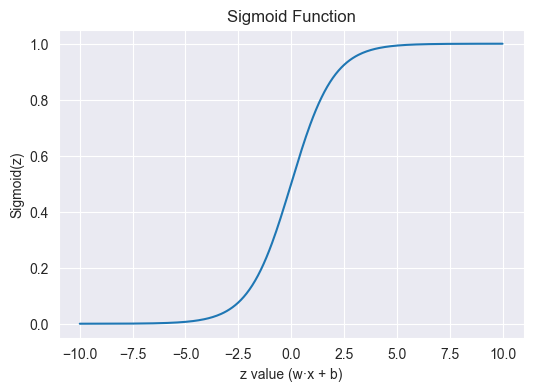

In [127]:
# ==============================
# SIGMOID CURVE VISUALIZATION
# ==============================
z_range = np.linspace(-10, 10, 300)
sigmoid_curve = sigmoid(z_range)

plt.figure(figsize=(6,4))
plt.plot(z_range, sigmoid_curve)
plt.xlabel("z value (w·x + b)")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function")
plt.grid(True)
plt.savefig("charts/sigmoid_function.png", dpi=300)
plt.show()

In [128]:
# ==============================
# SAVE TRAINED MODEL & SCALER
# ==============================

import joblib
import os

# Create models directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the trained Logistic Regression model
joblib.dump(log_model, "models/logistic_model.pkl")

# Save the fitted scaler
joblib.dump(scaler, "models/scaler.pkl")

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


## evaluate model

In [129]:
y_pred_log = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)


print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))



Accuracy: 0.97

Confusion Matrix:
 [[106   1]
 [  4  60]]


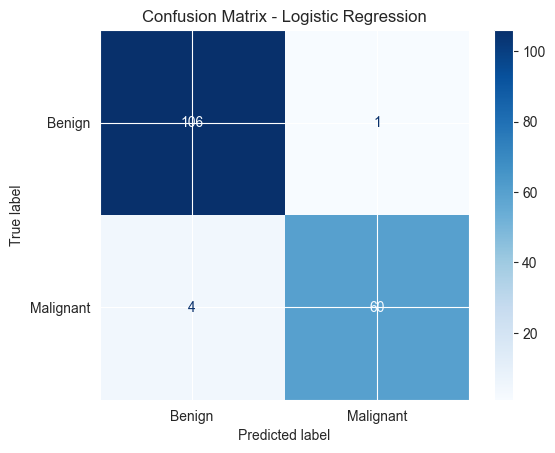

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_log)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Benign", "Malignant"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("charts/confusionMatrix_lr.png")
plt.show()


In [131]:
## Cross-Entropy Loss (Log Loss) - Logistic Regression
# Probabilities predicted by Logistic Regression
y_prob_log = log_model.predict_proba(X_test)

# Cross-Entropy Loss
ce_loss = log_loss(y_test, y_prob_log)

print(f"Cross-Entropy (Log Loss): {ce_loss:.4f}")


Cross-Entropy (Log Loss): 0.0669


## Generating a Classification Report for More Detailed Evaluation

In [132]:
from sklearn.metrics import classification_report
# generate a classification report
report = classification_report(y_test, y_pred_log, target_names=["Benign", "Malignant"])
print(report)

              precision    recall  f1-score   support

      Benign       0.96      0.99      0.98       107
   Malignant       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [133]:
cv_scores_log = cross_val_score(
    log_model, X_train, y_train, cv=5, scoring='accuracy'
)

print("Cross-Validation Scores:", cv_scores_log)
print("Mean CV Accuracy:", cv_scores_log.mean())


Cross-Validation Scores: [0.9375     0.9875     0.975      0.93670886 0.96202532]
Mean CV Accuracy: 0.959746835443038


## knn Train model

In [134]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [135]:
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9590643274853801

Confusion Matrix:
 [[107   0]
 [  7  57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



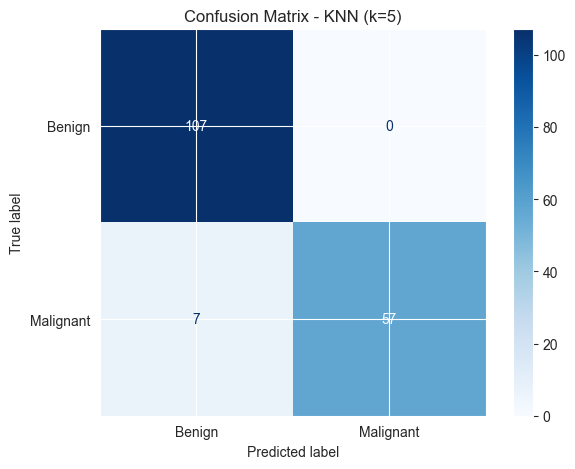

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_knn,
    display_labels=["Benign", "Malignant"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - KNN (k=5)")
plt.tight_layout()
plt.savefig("charts/confusionMatrix_knn.png")
plt.show()


In [137]:
cv_scores_knn = cross_val_score(
    knn, X_train, y_train, cv=5, scoring='accuracy'
)

print("KNN CV Scores:", cv_scores_knn)
print("Mean CV Accuracy:", cv_scores_knn.mean())


KNN CV Scores: [0.9375     0.9875     0.9875     0.98734177 0.92405063]
Mean CV Accuracy: 0.9647784810126583


In [138]:
# ==============================
# SELECT & PRINT BEST MODEL RESULT using CV scores comparison
# ==============================

log_acc = cv_scores_log.mean()
knn_acc = cv_scores_knn.mean()

if log_acc > knn_acc:
    best_model_name = "Logistic Regression"
    best_accuracy = log_acc
else:
    best_model_name = "K-Nearest Neighbors (KNN)"
    best_accuracy = knn_acc

print("\n🏆 BEST MODEL RESULT")
print("======================")
print(f"Best Model     : {best_model_name}")
print(f"Best Accuracy  : {best_accuracy:.4f}")



🏆 BEST MODEL RESULT
Best Model     : K-Nearest Neighbors (KNN)
Best Accuracy  : 0.9648


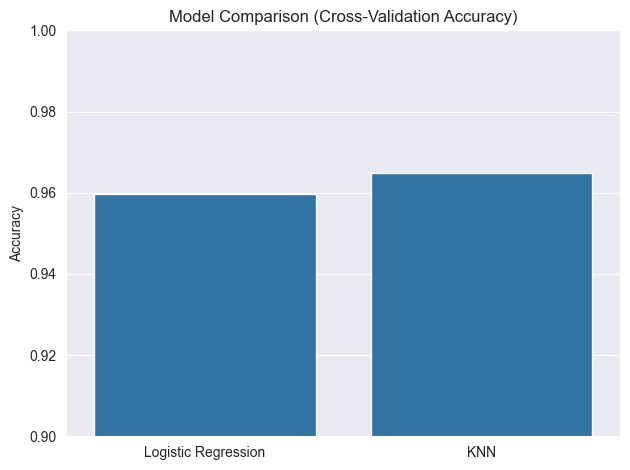

In [139]:
models = ['Logistic Regression', 'KNN']
accuracy = [cv_scores_log.mean(), cv_scores_knn.mean()]

sns.barplot(x=models, y=accuracy)
plt.title("Model Comparison (Cross-Validation Accuracy)")
plt.ylabel("Accuracy")
plt.ylim(0.9,1)
plt.tight_layout()
plt.savefig("charts/model_comparison.png", dpi=300)
plt.show()


## Visualize Top 10 Features

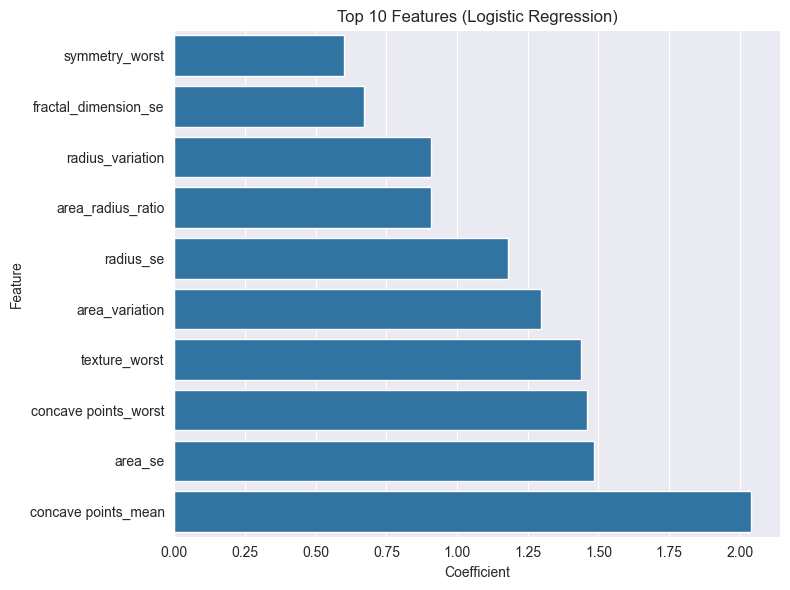

In [140]:
importance_df = pd.DataFrame({
    'Feature': top10_features,
    'Coefficient': np.abs(log_model.coef_[0])
}).sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title("Top 10 Features (Logistic Regression)")
plt.tight_layout()
plt.savefig("charts/top_10_features_logistic.png", dpi=300)
plt.show()

In [141]:
# ==============================
# SAVE TRAINED MODEL & SCALER
# ==============================

import joblib
import os

# Create models directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the trained Logistic Regression model
joblib.dump(log_model, "models/logistic_model.pkl")

# Save the fitted scaler
joblib.dump(scaler, "models/scaler.pkl")

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!
